# **Aula 4 - Random forest - Classificação**

## **4.1 O Modelo**

*Random Forests* (Florestas aleatórias) são conjuntos de árvores de decisão. *Random Forests* combinam muitas árvores de decisão para reduzir o risco de *overfitting*. A implementação `spark.ml` dá suporte a *random forests* para classificação binária ou multiclasse e para regressão, usando *features* contínuas e categóricas.

<font size=2>**Fonte:** [MLlib](https://spark.apache.org/docs/latest/ml-classification-regression.html#random-forest-classifier)
| [Random Forests](https://spark.apache.org/docs/latest/ml-classification-regression.html#random-forests)</font>

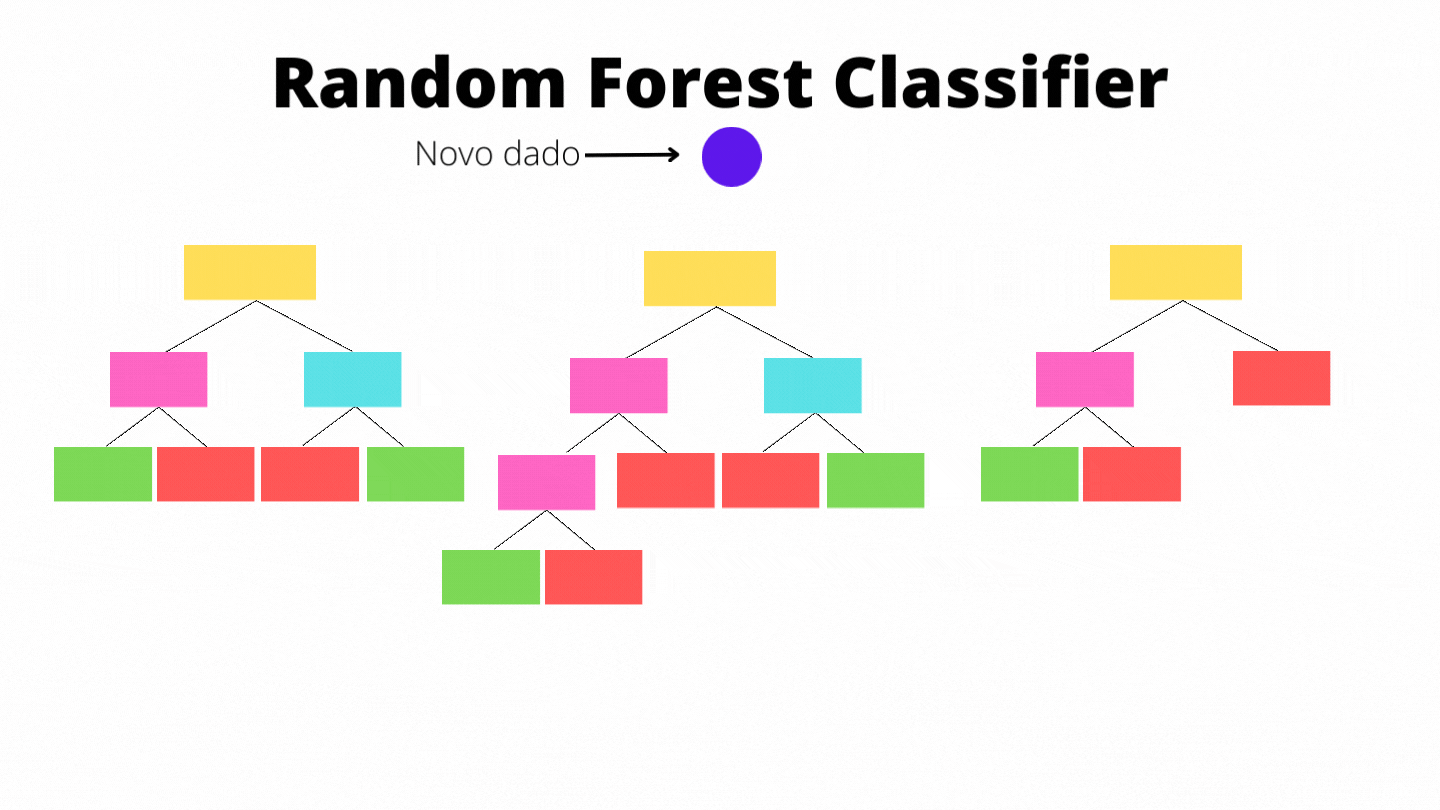

## **4.2 Ajuste e Previsão**

<font size=2>**Documentação:**</font>
<font size=2>[RandomForestClassifier](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.classification.RandomForestClassifier.html#randomforestclassifier)</font>

In [70]:
from pyspark.ml.classification import RandomForestClassifier

In [71]:
rfc = RandomForestClassifier(seed=SEED)

In [72]:
modelo_rfc = rfc.fit(treino)

In [73]:
previsoes_rfc_treino = modelo_rfc.transform(treino)

In [74]:
previsoes_rfc_treino.show()

+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|(24,[0,1,2,3,4,5,...|    0|[15.0052773466704...|[0.75026386733352...|       0.0|
|(24,[0,1,2,3,4,5,...|    0|[16.9295040273249...|[0.84647520136624...|       0.0|
|(24,[0,1,2,3,4,5,...|    0|[9.13052909106814...|[0.45652645455340...|       1.0|
|(24,[0,1,2,3,4,5,...|    0|[9.13052909106814...|[0.45652645455340...|       1.0|
|(24,[0,1,2,3,4,5,...|    0|[8.59288938528764...|[0.42964446926438...|       1.0|
|(24,[0,1,2,3,4,5,...|    1|[5.59647122885698...|[0.27982356144284...|       1.0|
|(24,[0,1,2,3,4,5,...|    0|[9.33276328267787...|[0.46663816413389...|       1.0|
|(24,[0,1,2,3,4,5,...|    1|[5.21616013157118...|[0.26080800657855...|       1.0|
|(24,[0,1,2,3,4,5,...|    0|[5.45640255581361...|[0.27282012779068...|       1.0|
|(24,[0,1,2,3,4,

## **4.3 Métricas**

In [75]:
previsoes_rfc_teste = modelo_rfc.transform(teste)

In [76]:
previsoes_rfc_teste.show()

+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|(24,[0,1,2,3,4,5,...|    0|[16.7433871675615...|[0.83716935837807...|       0.0|
|(24,[0,1,2,3,4,5,...|    0|[7.27313214599648...|[0.36365660729982...|       1.0|
|(24,[0,1,2,3,4,5,...|    1|[7.46885072161585...|[0.37344253608079...|       1.0|
|(24,[0,1,2,3,4,5,...|    1|[9.33276328267787...|[0.46663816413389...|       1.0|
|(24,[0,1,2,3,4,5,...|    0|[7.79829004739264...|[0.38991450236963...|       1.0|
|(24,[0,1,2,3,4,5,...|    0|[7.13263407834549...|[0.35663170391727...|       1.0|
|(24,[0,1,2,3,4,5,...|    0|[4.45872635511159...|[0.22293631775557...|       1.0|
|(24,[0,1,2,3,4,5,...|    0|[7.84691519125130...|[0.39234575956256...|       1.0|
|(24,[0,1,2,3,4,5,...|    0|[9.94796150783366...|[0.49739807539168...|       1.0|
|(24,[0,1,2,3,4,

In [77]:
print('Random Forest Classifier')
print("="*40)
print("Dados de Treino")
print("="*40)
print("Matriz de Confusão")
print("-"*40)
calcula_mostra_matriz_confusao(previsoes_rfc_treino, normalize=False)
print("-"*40)
print("Métricas")
print("-"*40)
print("Acurácia: %f" % evaluator.evaluate(previsoes_rfc_treino, {evaluator.metricName: "accuracy"}))
print("Precisão: %f" % evaluator.evaluate(previsoes_rfc_treino, {evaluator.metricName: "precisionByLabel", evaluator.metricLabel: 1}))
print("Recall: %f" % evaluator.evaluate(previsoes_rfc_treino, {evaluator.metricName: "recallByLabel", evaluator.metricLabel: 1}))
print("F1: %f" % evaluator.evaluate(previsoes_rfc_treino, {evaluator.metricName: "fMeasureByLabel", evaluator.metricLabel: 1}))
print("")
print("="*40)
print("Dados de Teste")
print("="*40)
print("Matriz de Confusão")
print("-"*40)
calcula_mostra_matriz_confusao(previsoes_rfc_teste, normalize=False)
print("-"*40)
print("Métricas")
print("-"*40)
print("Acurácia: %f" % evaluator.evaluate(previsoes_rfc_teste, {evaluator.metricName: "accuracy"}))
print("Precisão: %f" % evaluator.evaluate(previsoes_rfc_teste, {evaluator.metricName: "precisionByLabel", evaluator.metricLabel: 1}))
print("Recall: %f" % evaluator.evaluate(previsoes_rfc_teste, {evaluator.metricName: "recallByLabel", evaluator.metricLabel: 1}))
print("F1: %f" % evaluator.evaluate(previsoes_rfc_teste, {evaluator.metricName: "fMeasureByLabel", evaluator.metricLabel: 1}))

Random Forest Classifier
Dados de Treino
Matriz de Confusão
----------------------------------------
                     Previsto
                Churn       Não-Churn
     Churn        2950         661
Real
     Não-Churn    884         2711
----------------------------------------
Métricas
----------------------------------------
Acurácia: 0.785595
Precisão: 0.769431
Recall: 0.816948
F1: 0.792478

Dados de Teste
Matriz de Confusão
----------------------------------------
                     Previsto
                Churn       Não-Churn
     Churn        1257         306
Real
     Não-Churn    416         1163
----------------------------------------
Métricas
----------------------------------------
Acurácia: 0.770210
Precisão: 0.751345
Recall: 0.804223
F1: 0.776885
